In [1]:
# 1. Import the required library
import requests

# 2. Define the input parameters
latitude = -37.6983    # Latitude for the location
longitude = 145.0597   # Longitude for the location

# 3. Define the API endpoint URL
url = "https://api.open-meteo.com/v1/forecast"

# 4. Prepare the parameters for the API call
params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": "temperature_2m,rain"  # Request temperature and rain data
}

# 5. Make the API call using GET
try:
    response = requests.get(url, params=params, timeout=10)

    # 6. Check if the request was successful (status code 200)
    if response.status_code == 200:
        # 7. Parse the response JSON
        data = response.json()

        # 8. Extract useful data from the response
        hourly_data = data.get('hourly', {})
        times = hourly_data.get('time', [])
        temperatures = hourly_data.get('temperature_2m', [])
        rains = hourly_data.get('rain', [])

        # 9. Display the first 5 records nicely
        print("\nFirst 5 Hours of Forecast:")
        for i in range(min(5, len(times))):
            print(f"Time: {times[i]} | Temperature: {temperatures[i]}°C | Rain: {rains[i]} mm")

    else:
        # If the server returns an error status
        print(f"Error: Received status code {response.status_code}")

except requests.exceptions.Timeout:
    # If the request took too long and timed out
    print("Error: The request timed out.")
except requests.exceptions.RequestException as e:
    # If any other error occurred during the request
    print(f"Error: An unexpected error occurred: {e}")



First 5 Hours of Forecast:
Time: 2025-04-28T00:00 | Temperature: 14.6°C | Rain: 0.0 mm
Time: 2025-04-28T01:00 | Temperature: 15.9°C | Rain: 0.0 mm
Time: 2025-04-28T02:00 | Temperature: 16.7°C | Rain: 0.0 mm
Time: 2025-04-28T03:00 | Temperature: 17.3°C | Rain: 0.0 mm
Time: 2025-04-28T04:00 | Temperature: 17.7°C | Rain: 0.0 mm


In [2]:
import matplotlib.pyplot as plt

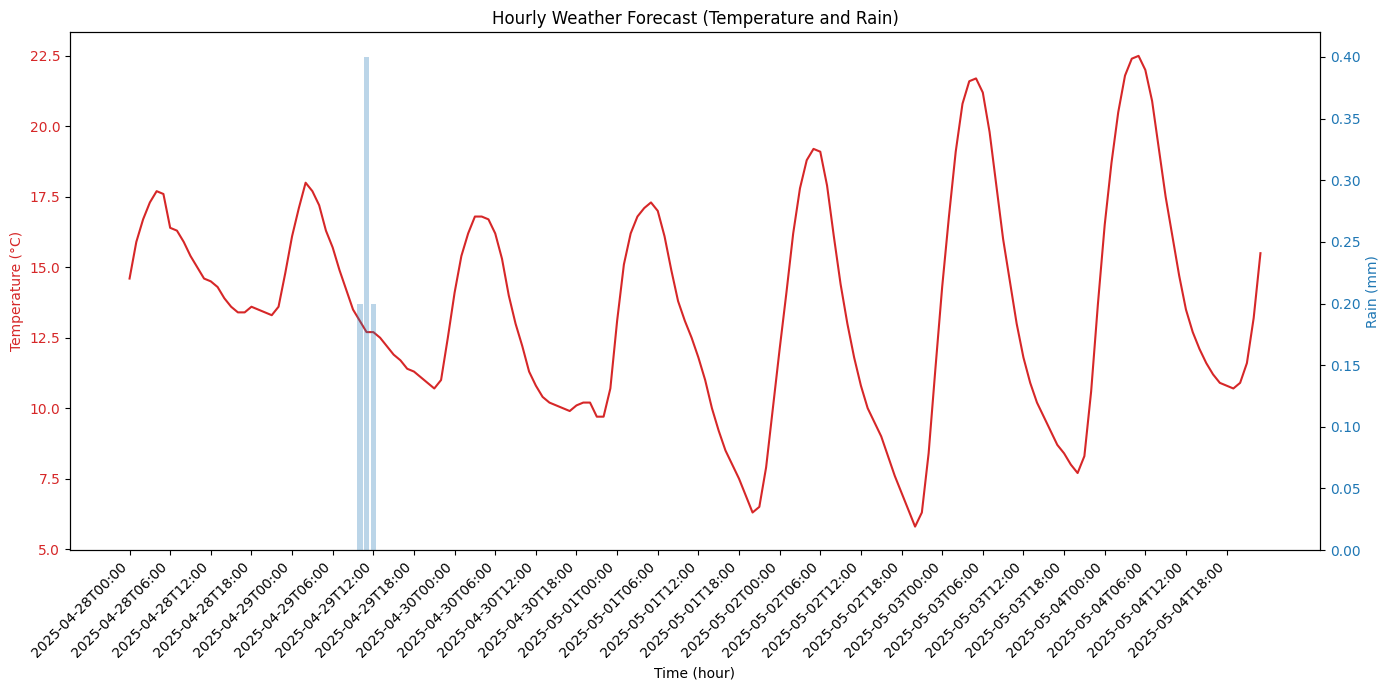

In [3]:
# 10. Plot the data
fig, ax1 = plt.subplots(figsize=(14, 7))
# Plot temperature on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Time (hour)')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(times, temperatures, color=color, label='Temperature (°C)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(times[::6])  # Show every 6th hour label for clarity
ax1.set_xticklabels(times[::6], rotation=45, ha='right')
# Create second y-axis for rain
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Rain (mm)', color=color)
ax2.bar(times, rains, color=color, alpha=0.3, label='Rain (mm)')
ax2.tick_params(axis='y', labelcolor=color)
# Add a title and adjust layout
plt.title('Hourly Weather Forecast (Temperature and Rain)')
fig.tight_layout()
# Show the final plot
plt.show()